## Data Engineer Role Technical Assessment

### Submitted by: Hasan Celik

This notebook contains solutions to the technical assessment for a classified data engineer position. The following tasks involve data extraction, transformation, analysis, and visualization using Python, SQL, and various data engineering principles.


### Question 1: Create an ERD for the PUBLIC schema

- **Tool Used**: Lucidchart
- **Approach**:  Analyzed the `POSTS`, `SEGMENTS`, and `RETAIL` tables in the schema and identified key relationships between them. Below is a brief explanation of the relationships and cardinality.




#### Relationships and Cardinality

1. **POSTS and SEGMENTS**:
    - **One-to-Many Relationship**: 
      The crow's foot notation on the `POSTS` side indicates that one user from the `SEGMENTS` table can have multiple posts in the `POSTS` table. However, each post is associated with one and only one user from the `SEGMENTS` table. This establishes that one segment can encompass multiple users, and those users can create multiple posts.

    - **Primary Key in SEGMENTS**: 
      The `USER_ID` column in the `SEGMENTS` is the primary key. A Unique identifier that each user belongs to only one segment. 

    - **Foreign Key in POSTS**: 
      Although not explicitly enforced as a foreign key in the database, the `USER_ID` column in the `POSTS` table behaves like a foreign key. It logically links each post to a corresponding user in the `SEGMENTS` table.


2. **POSTS and RETAIL**:
    - **No Direct Relationship**: 
      There is no direct link between the `POSTS` and `RETAIL` tables. These tables represent separate domains: `POSTS` handles social media data, while `RETAIL` stores retail product-related information.



#### Python Code and ERD

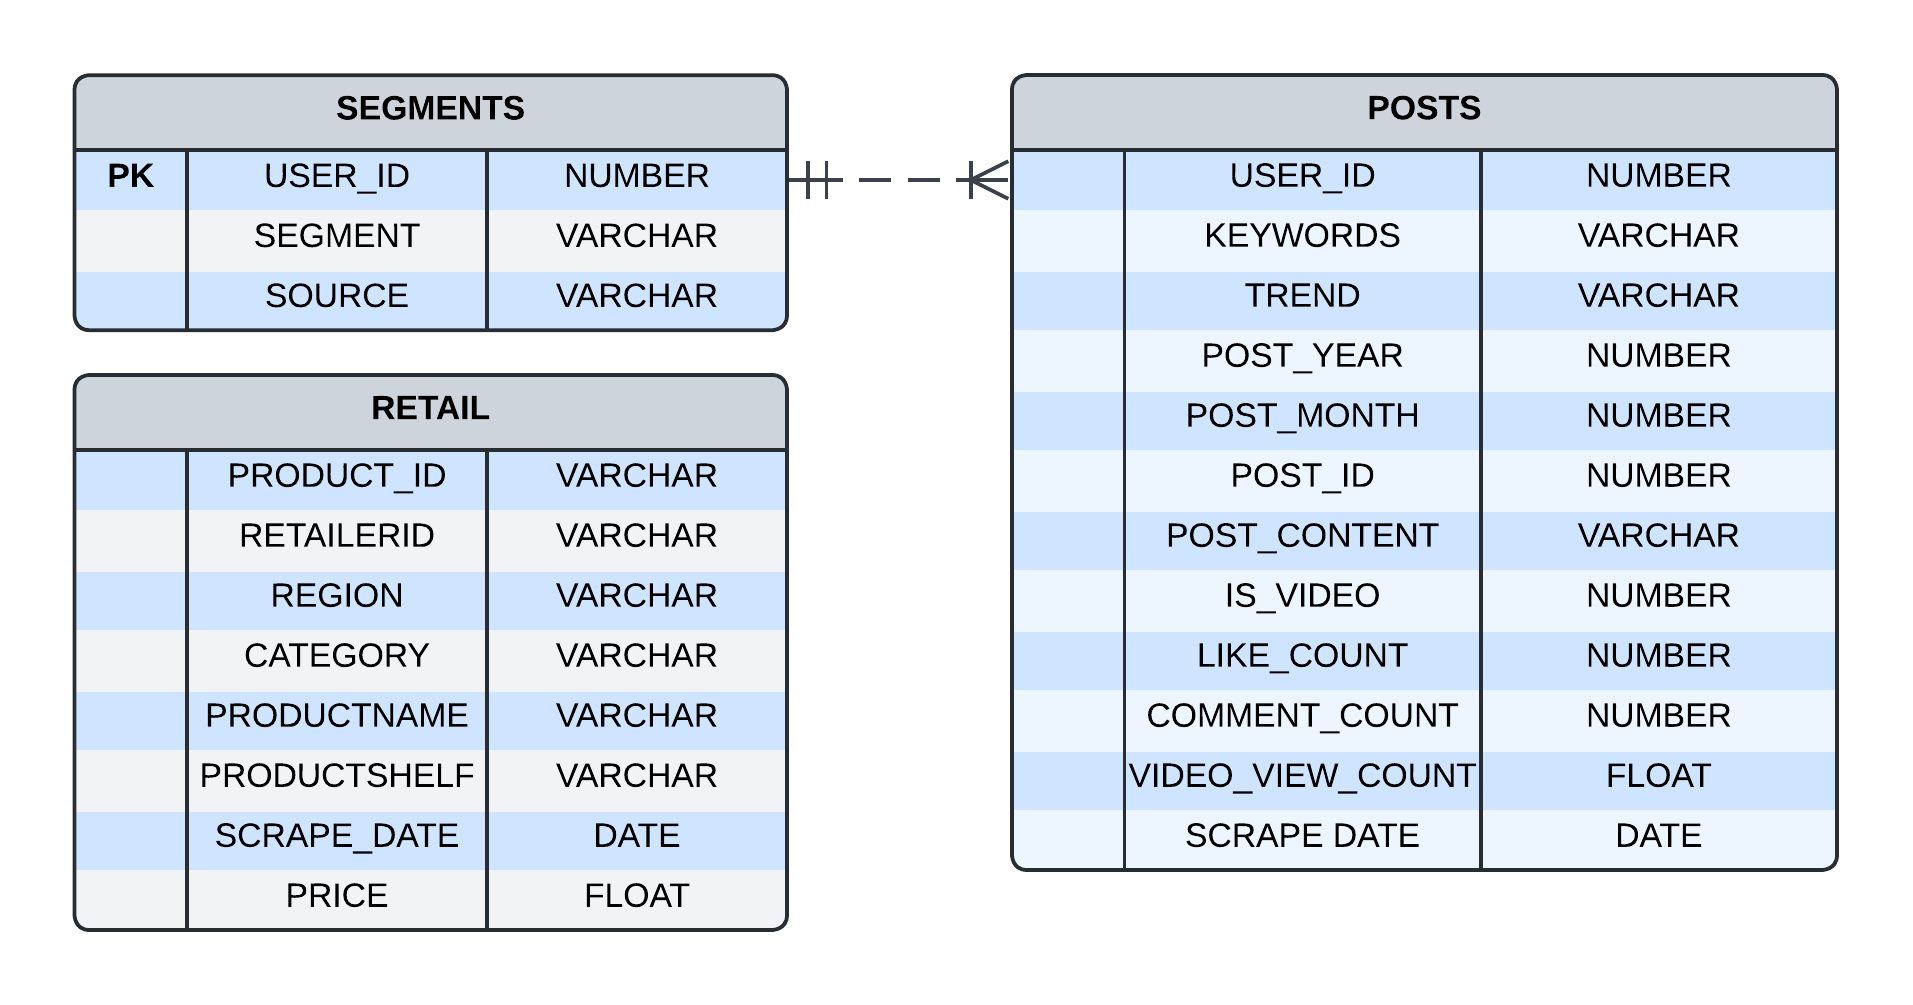

In [10]:
from IPython.display import Image, display

# Replace 'path_to_erd_image.png' with the actual path to your image
image_path = 'C:/Users/egeha/Desktop/ERD.png'

# Display the image
display(Image(filename=image_path))

### Question 2: Create a data dictionary for the tables in the PUBLIC schema.

- **Tool Used**: Pandas, IPython
- **Approach**: Conducted a SQL Query and downloaded the Information Schema of each table in PUBLIC schema as CSV file.
- **Pandas Dictionary and DataFrame**: : The PUBLIC schema consists of three tables: POSTS, SEGMENTS, and RETAIL. The following is a detailed data dictionary for each table, including their attributes, data types, and descriptions.



#### SQL Query




```SQL
SELECT column_name, data_type, character_maximum_length, is_nullable, column_default
FROM information_schema.columns 
WHERE table_name = 'SEGMENTS';
```

#### Python Code

In [42]:
import pandas as pd

# Load the CSV files into pandas dataframes
segments_df = pd.read_csv('SEGMENTS_INFORMATION_SCHEMA.csv')
posts_df = pd.read_csv('POSTS_INFORMATION_SCHEMA.csv')
retail_df = pd.read_csv('RETAIL_INFORMATION_SCHEMA.csv')

# Adding Descriptions for tables
segments_df['Description'] = [
        'PRIMARY KEY: Unique identifier of the user',
        'Source of user data (e.g., Brand/Retailer, Influencer)',
        'The segment of user belongs to'
    ]

posts_df['Description'] = [
        'Keywords related with the post content',
        'Unique identifier of the post',
        'Month when the post was shared',
        'Year when the post was shared',
        'Unique identifier of the user shared the post',
        'Number of comments on the post',
        'Boolean value whether the post contains a video',
        'Number of likes received by the post',
        'Date when the post data was collected or scraped',
        'Number of views on the video',
        'The actual content of the post',
        'The trend associated with the post'
    ]


retail_df['Description'] = [
        'The price of the product',
        'The category of the product',
        'Information related to where the product is placed',
        'Unique identifier for the product',
        'Name of the product',
        'Geographic region where the product is sold',
        'Date when the retail data was collected or scraped.',
        'Unique identifier for the retailer selling the product'
    ]


#### Segments Dictionary

In [41]:
display(segments_df)

,COLUMN_NAME,DATA_TYPE,CHARACTER_MAXIMUM_LENGTH,IS_NULLABLE,COLUMN_DEFAULT,Description
0,USER_ID,NUMBER,NaN,NO,NaN,PRIMARY KEY: Unique identifier of the user
1,SOURCE,TEXT,16777216.0,NO,NaN,"Source of user data (e.g., Brand/Retailer, Inf..."
2,SEGMENT,TEXT,16777216.0,NO,NaN,The segment of user belongs to


#### Posts Dictionary

In [43]:
display(posts_df)

,COLUMN_NAME,DATA_TYPE,CHARACTER_MAXIMUM_LENGTH,IS_NULLABLE,COLUMN_DEFAULT,Description
0,KEYWORDS,TEXT,16777216.0,YES,NaN,Keywords related with the post content
1,POST_ID,NUMBER,NaN,YES,NaN,Unique identifier of the post
2,POST_MONTH,NUMBER,NaN,YES,NaN,Month when the post was shared
3,POST_YEAR,NUMBER,NaN,YES,NaN,Year when the post was shared
4,USER_ID,NUMBER,NaN,YES,NaN,Unique identifier of the user shared the post
5,COMMENT_COUNT,NUMBER,NaN,YES,NaN,Number of comments on the post
6,IS_VIDEO,NUMBER,NaN,YES,NaN,Boolean value whether the post contains a video
7,LIKE_COUNT,NUMBER,NaN,YES,NaN,Number of likes received by the post
8,SCRAPE_DATE,DATE,NaN,YES,NaN,Date when the post data was collected or scraped
9,VIDEO_VIEW_COUNT,FLOAT,NaN,YES,NaN,Number of views on the video


#### Retail Dictionary

In [48]:
display(retail_df)

,COLUMN_NAME,DATA_TYPE,CHARACTER_MAXIMUM_LENGTH,IS_NULLABLE,COLUMN_DEFAULT,Description
0,PRICE,FLOAT,NaN,YES,NaN,The price of the product
1,CATEGORY,TEXT,16777216.0,YES,NaN,The category of the product
2,PRODUCTSHELF,TEXT,16777216.0,YES,NaN,Information related to where the product is pl...
3,PRODUCTID,TEXT,16777216.0,YES,NaN,Unique identifier for the product
4,PRODUCTNAME,TEXT,16777216.0,YES,NaN,Name of the product
5,REGION,TEXT,16777216.0,YES,NaN,Geographic region where the product is sold
6,SCRAPE_DATE,DATE,NaN,YES,NaN,Date when the retail data was collected or scr...
7,RETAILERID,TEXT,16777216.0,YES,NaN,Unique identifier for the retailer selling the...


### Question 3: How would you decide on which data warehouse to use when running queries?
- **Tool Used**: Snowflake
- **Approach**: The decision on which data warehouse to use involves analyzing factors such as performance, scalability, data size, query complexity, and cost. The analysis included comparing Snowflake and other cloud data warehouses in terms of their ability to handle large datasets, ease of use, and integration with BI tools.
- **Decision Factors**: Snowflake is known for its ability to scale compute resources dynamically, its native support for semi-structured data, and seamless integration with BI tools like Tableau.

#### Answer
##### **1. Query Performance & Workload**
- Select based on query complexity, latency requirements, and concurrency support (e.g., Snowflake for high concurrency).

##### **2. Scalability**
- Choose a warehouse with elastic scaling to accommodate growing data volumes (e.g., Google BigQuery or Snowflake).

##### **3. Cost Efficiency**
- Opt for usage-based pricing (Snowflake, Google BigQuery) or reserved pricing for predictable workloads (Amazon Redshift).

##### **4. Data Integration & Compatibility**
- Ensure compatibility with ETL/ELT tools and support for semi-structured data formats (Snowflake, BigQuery).

##### **5. Security & Compliance**
- Pick a warehouse offering encryption, fine-grained access control, and compliance certifications (e.g., Snowflake for data masking).

##### **6. Tool Integration & Ecosystem**
- Ensure easy integration with BI tools (e.g., Tableau, Looker) and developer tools (APIs, SDKs).

##### **7. Maintenance & Ease of Use**
- Choose a fully managed solution like Snowflake or Google BigQuery to minimize operational overhead.

### Question 4: Using Python, write a function that extracts the posts table to a DataFrame.
- **Tool Used**: Python, SQL, Snowflake
- **Approach**: Extracted the actual data from POSTS table using an SQL query. Stored the result of SQL Query in a Pandas DataFrame.

#### Python Code

In [3]:
import pandas as pd

# Defining a function to load the CSV data into a pandas DataFrame
def extract_posts_from_csv(file_path: str) -> pd.DataFrame:
    # Read the CSV file into a pandas DataFrame
    posts_df = pd.read_csv(file_path)
    
    # Return the DataFrame
    return posts_df

# Example usage: Assuming the file is named 'Question_4_DataFrame.csv'
file_path = 'Question_4_DataFrame.csv'

# Call the function to load the data
posts_df = extract_posts_from_csv(file_path)

# Display the first few rows of the DataFrame
posts_df


,TREND,KEYWORDS,USER_ID,POST_YEAR,POST_MONTH,POST_ID,POST_CONTENT,IS_VIDEO,LIKE_COUNT,COMMENT_COUNT,VIDEO_VIEW_COUNT,SCRAPE_DATE
0,other,NaN,257926869,2018,11,1909034536147122041,NaN,0,1014,8,NaN,2020-07-08
1,other,NaN,5913362243,2019,1,1961806336414320683,NaN,0,244,2,NaN,2020-09-11
2,other,NaN,7417081236,2019,7,2086421223458557966,NaN,0,17,0,NaN,2020-09-11
3,other,NaN,2227139053,2019,9,2125374286775469882,NaN,0,703,42,NaN,2020-09-11
4,other,NaN,4789062396,2020,10,2420778226459008263,NaN,0,546,8,NaN,2020-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...
17252,cold brew coffee,"[""#icedcoffee""]",241158144,2018,2,1719629380583779966,Iced coffee by the beach,0,215,7,NaN,2020-09-11
17253,other,NaN,2252202878,2019,2,1989388138943611291,NaN,0,400,135,NaN,2020-09-11
17254,other,NaN,255794073,2019,7,2100012280279378036,NaN,0,1003,72,NaN,2020-07-07
17255,other,NaN,8425493235,2018,9,1876785899355025148,NaN,1,273,23,7124.0,2020-11-13


### Question 5: Using posts and segments:

- **Tool Used**: SQL, Python, Matplotlib, Seaborn
- ***Approach***: Exploratory Data Analysis 
- **Data Preparation:** Filter and clean the data to ensure that only relevant information is used for analysis, 
- **Data Exploration:** Analyze the trends over time, user engagement, and key performance indicators such as likes, comments, and video views.
- **Visualization and Insights:** Present the results using visualizations that clearly communicate the findings to stakeholders.


#### 5a: How many posts were shared on November 2020? 
#### SQL Query

```SQL
SELECT COUNT(*)
FROM DEMO.PUBLIC.POSTS
WHERE POST_YEAR = 2020
AND POST_MONTH = 11;
```

= 605


#### **5b. Summarize the cold brew trend through exploratory data analysis (EDA)**

#### 1. Data Preparation:
- We filter the `POSTS` table to only include posts tagged with the trend "cold brew coffee"
- We ensure that the data is clean and ready for analysis.
    - **SQL Query**:
    ```SQL
SELECT *
FROM DEMO.PUBLIC_POSTS
WHERE TREND = 'cold brew coffee' AND POST_CONTENT IS NOT NULL;
    ```
#### 2. Data Exploration:
- **Trend Over Time**: We analyze the number of posts related to cold brew over time (months/years) to spot trends in interest.
  - **SQL Query**:
    ```sql
SELECT POST_YEAR, POST_MONTH, COUNT(*) AS total_posts, COUNT(DISTINCT USER_ID) AS unique_users
FROM DEMO.PUBLIC.POSTS
WHERE TREND ='cold brew coffee'
GROUP BY POST_YEAR, POST_MONTH
ORDER BY POST_YEAR, POST_MONTH;
    ```
- **Engagement Metrics**: We analyze the engagement metrics for cold brew posts (likes, comments, video views).
  - **SQL Query**:
    ```sql
    SELECT AVG(LIKE_COUNT) AS avg_likes, 
    AVG(COMMENT_COUNT) AS avg_comments, AVG(VIDEO_VIEW_COUNT) AS avg_video_views
    FROM DEMO.PUBLIC.POSTS
    WHERE TREND ='cold brew coffee';
    ```
- **User Segmentation**: As the question asks with `POSTS` and `SEGMENTS`, We query the number of cold brew related posts from each user segmentation along with average metrics to identify which user groups are mostly engaged with cold brew posts.
    - **SQL Query**:
    ```SQL
    SELECT S.SEGMENT, COUNT(P.POST_ID) AS post_count, 
    AVG(P.LIKE_COUNT) AS avg_likes, 
    AVG(P.COMMENT_COUNT) AS avg_comments
    FROM DEMO.PUBLIC.POSTS P
    JOIN DEMO.PUBLIC.SEGMENTS S ON P.USER_ID = S.USER_ID
    WHERE P.TREND = 'cold brew coffee'
    GROUP BY S.SEGMENT;
    ```



#### 3. Visualization:

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
data_preparation = pd.read_csv('5_1.csv')
data_exploration = pd.read_csv('Data_Exploration.csv')
engagement_metrics = pd.read_csv('Engagement_metrics.csv')
user_segmentation = pd.read_csv('user_segmentation.csv')


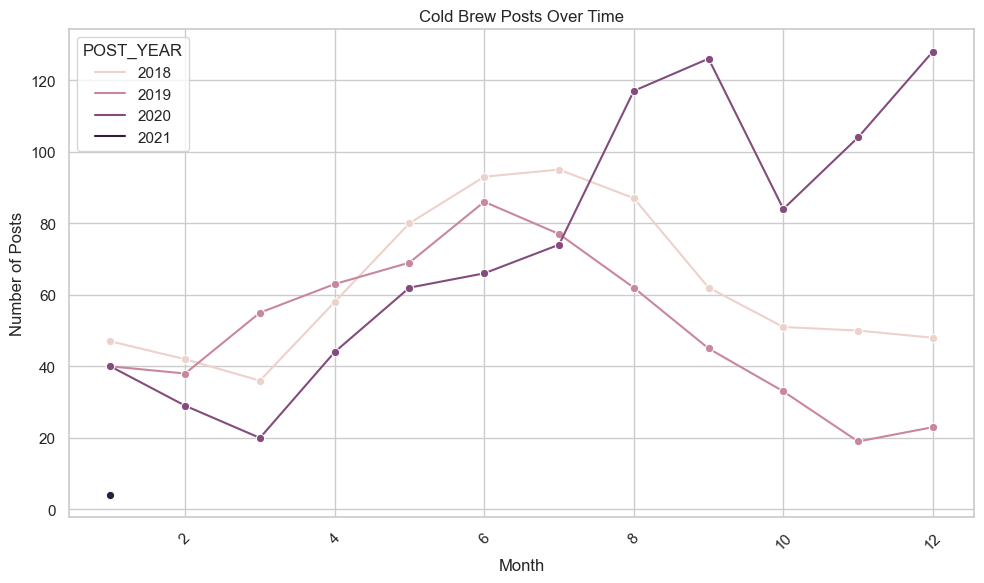

In [50]:
# Set seaborn style for better visuals
sns.set(style="whitegrid")

# Line plot for posts over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_exploration, x='POST_MONTH', y='TOTAL_POSTS', hue='POST_YEAR', marker='o')

plt.title('Cold Brew Posts Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

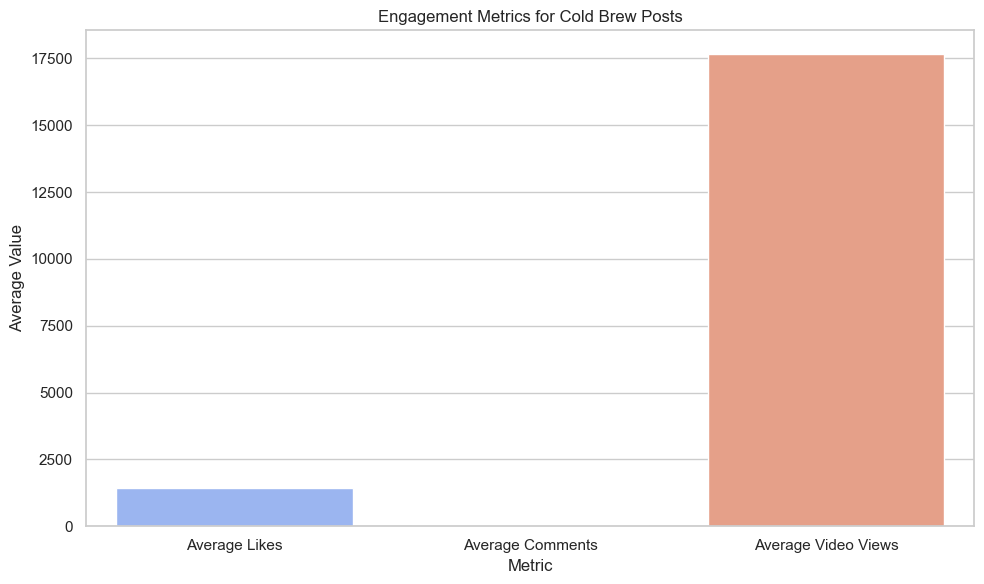

In [52]:
# Bar plot for engagement metrics
engagement_metrics_df = pd.DataFrame({
    'Metric': ['Average Likes', 'Average Comments', 'Average Video Views'],
    'Values': [engagement_metrics['AVG_LIKES'][0], 
               engagement_metrics['AVG_COMMENTS'][0], 
               engagement_metrics['AVG_VIDEO_VIEWS'][0]]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Values', data=engagement_metrics_df, palette='coolwarm')
plt.title('Engagement Metrics for Cold Brew Posts')
plt.xlabel('Metric')
plt.ylabel('Average Value')
plt.tight_layout()
plt.show()


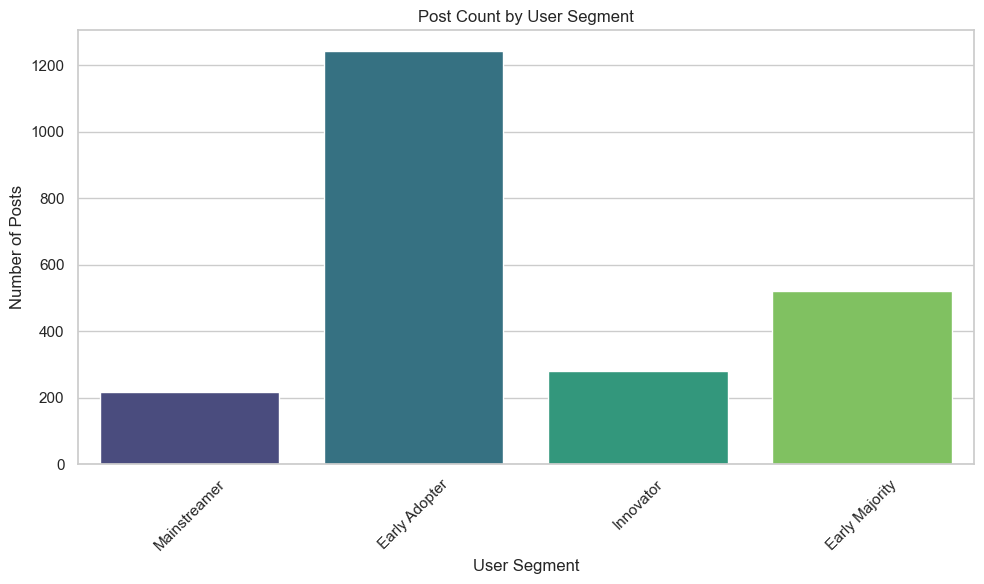

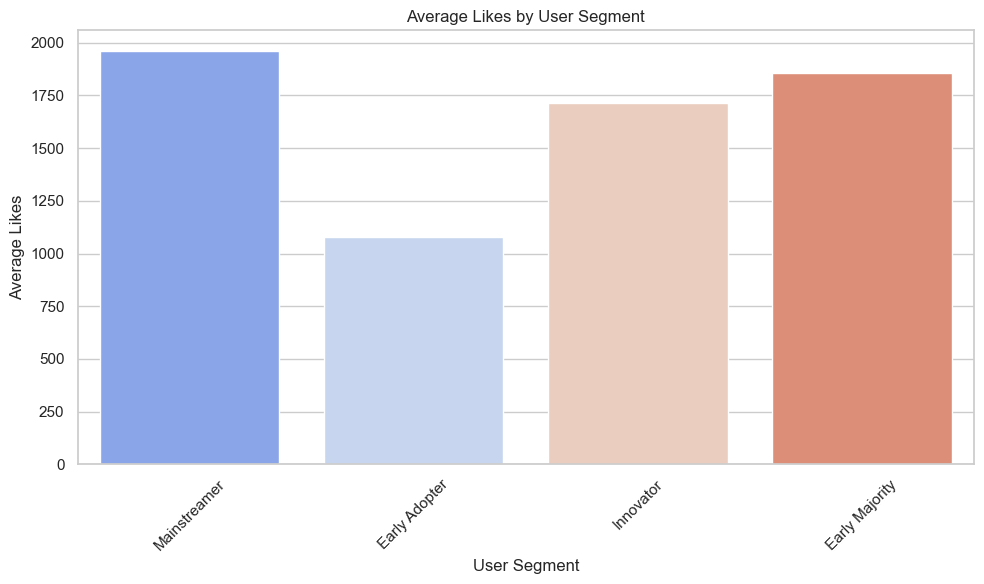

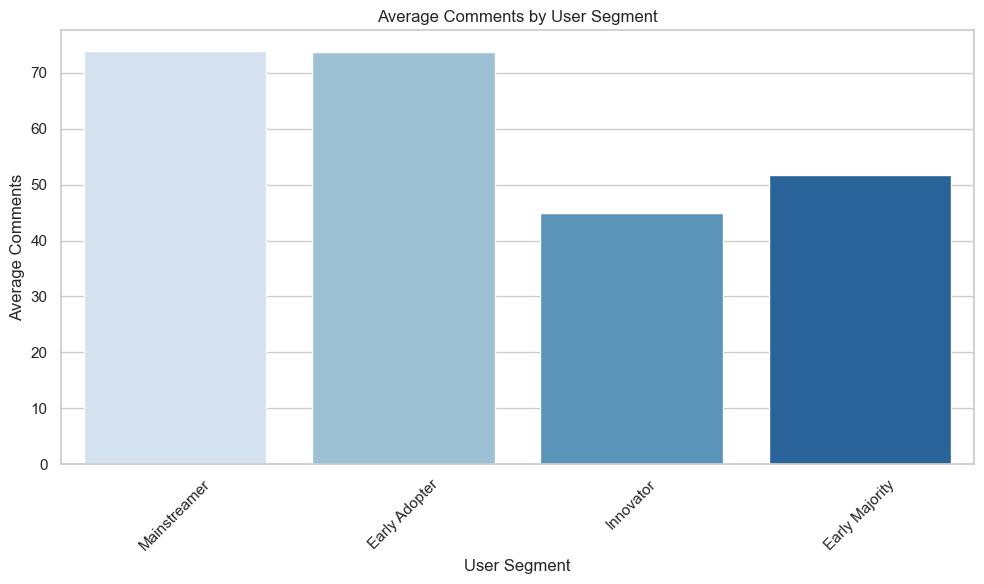

In [54]:
# Bar plot for user segmentation
plt.figure(figsize=(10, 6))

# Plot for number of posts by segment
sns.barplot(x='SEGMENT', y='POST_COUNT', data=user_segmentation, palette='viridis')
plt.title('Post Count by User Segment')
plt.xlabel('User Segment')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for average likes by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='SEGMENT', y='AVG_LIKES', data=user_segmentation, palette='coolwarm')
plt.title('Average Likes by User Segment')
plt.xlabel('User Segment')
plt.ylabel('Average Likes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for average comments by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='SEGMENT', y='AVG_COMMENTS', data=user_segmentation, palette='Blues')
plt.title('Average Comments by User Segment')
plt.xlabel('User Segment')
plt.ylabel('Average Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Question 6. Create a new column that cleans post_content in the POSTS table**
- **Tool Used**: SQL, Regular Expressions
- **Approach**: A SQL query with `REGEXP_REPLACE` was used to clean the `POST_CONTENT` column. The operation removed special characters and unwanted symbols to standardize the text format.
- **Output**: A cleaned `POST_CONTENT` column was added to the dataset.



#### Objective:
We need to clean the `post_content` column by removing non-ASCII characters (such as special symbols and foreign characters) and standardizing the text to lowercase. This ensures that the text is consistent and easier to analyze.

#### Approach:
We will:
1. Convert the text to lowercase for consistency.
2. Remove any non-ASCII characters (characters outside the standard English alphabet).
3. Filter out rows where the `POST_CONTENT` is `NULL`.

#### SQL Query:

```sql
SELECT 
    POST_ID, 
    POST_CONTENT AS original_post_content,
    LOWER(REGEXP_REPLACE(POST_CONTENT, '[^\X00-\X7F]', '')) AS cleaned_post_content
FROM 
    DEMO.PUBLIC.POSTS
WHERE 
    POST_CONTENT IS NOT NULL;
```

### **Question 7: Create a new column that extracts hashtags from the content column**
- **Tool Used**: SQL, Regular Expressions
- **Approach**: Used `REGEXP_SUBSTR` to extract hashtags from the `POST_CONTENT` field. A new column was created to store the extracted hashtags.
- **Output**: The new column includes the hashtags mentioned in each post.


#### **SQL Query**:
```sql
SELECT  
    POST_ID, 
    POST_CONTENT AS original_post_content,
    REGEXP_SUBSTR(POST_CONTENT, '#\\w+', 1, 1) AS extracted_hashtag_1,
    REGEXP_SUBSTR(POST_CONTENT, '#\\w+', 1, 2) AS extracted_hashtag_2,
    REGEXP_SUBSTR(POST_CONTENT, '#\\w+', 1, 3) AS extracted_hashtag_3,
FROM 
    DEMO.PUBLIC.POSTS
WHERE 
    POST_CONTENT IS NOT NULL;
```

### Question 8. Using a CTE, write a query that returns the 3 most frequently used hashtags by each user in the Posts table.
- **Tool Used**: SQL (CTE, Window Functions)
- **Approach**: A CTE (Common Table Expression) was used to extract hashtags per user, rank them by frequency, and select the top 3 hashtags for each user using `ROW_NUMBER()`.
- **Output**: The output includes the top 3 hashtags for each user, ordered by usage frequency.

#### 8.1 Objective:
The goal of this query is to extract hashtags from the `POST_CONTENT` column, count the frequency of each hashtag per user, and return the top 3 most used hashtags for each user.

#### 8.2 SQL Query:

```sql
WITH HashtagExtraction AS (
    SELECT
        USER_ID,
        REGEXP_SUBSTR(POST_CONTENT, '#\w+', 1, n) AS HASHTAG
    FROM
        POSTS,
        LATERAL FLATTEN(input => SPLIT(POST_CONTENT, ' ')) AS n
    WHERE
        POST_CONTENT IS NOT NULL
),
HashtagCounts AS (
    SELECT
        USER_ID,
        HASHTAG,
        COUNT(*) AS HashtagCount,
        RANK() OVER (PARTITION BY USER_ID ORDER BY COUNT(*) DESC) AS HashtagRank
    FROM
        HashtagExtraction
    WHERE
        HASHTAG IS NOT NULL
    GROUP BY
        USER_ID, HASHTAG
)
SELECT
    USER_ID,
    HASHTAG AS TopHashtags,
    HashtagCount
FROM
    HashtagCounts
WHERE
    HashtagRank <= 3
ORDER BY
    USER_ID, HashtagCount DESC;
```

### Question 9: Assuming 'other' trends represent the whole beverage market:
- **Tool Used**: SQL, Python, Matplotlib, Seaborn
- **Approach**: Analyzed cold brew posts by calculating their market share relative to "other" trends. Performance was evaluated based on post volume and engagement metrics such as likes and comments.
- **Output**: Market share percentage for cold brew within the beverage market.



#### a. How do you know if cold-brew specifically is performing well?

#### 9.a. Objective:
We want to analyze the performance of "cold brew coffee" compared to "other" trends in the beverage market. This will include the following metrics:
1. **Total Posts**: The total number of posts for each trend.
2. **Average Likes**: The average number of likes for posts in each trend.
3. **Average Comments**: The average number of comments per post.
4. **Average Video Views**: The average number of video views for posts with videos.
5. **Market Share**: The percentage of total posts that belong to the "cold brew coffee" trend compared to other trends.

#### b. What metrics would you use to show this?

#### 9.b. SQL Query:
We use a **Common Table Expression (CTE)** to first calculate the total post count and engagement metrics (likes, comments, video views) for each trend. Afterward, we calculate the **market share percentage** for each trend by dividing the total posts for that trend by the overall total posts.

#### 9.c. Best Charts for Visualization:
1. **Stacked Bar Chart**: Shows cold brew's market share vs. other trends.
2. **Line Chart**: Depicts the trend of cold brew posts over time.
3. **Bar Chart**: Illustrates the average engagement metrics.

```sql
-- Step 1: Calculate the basic metrics for 'cold brew coffee' and 'other' trends
 SELECT 
        TREND, 
        COUNT(POST_ID) AS total_posts, 
        AVG(LIKE_COUNT) AS avg_likes, 
        AVG(COMMENT_COUNT) AS avg_comments, 
        AVG(VIDEO_VIEW_COUNT) AS avg_video_views
    FROM DEMO.PUBLIC.POSTS
    WHERE TREND IN ('cold brew coffee', 'other') 
    GROUP BY TREND
),

SegmentAnalysis AS (
    -- Step 2: Analyze the number of posts and engagement metrics by user segment
    SELECT 
        S.SEGMENT, 
        P.TREND, 
        COUNT(P.POST_ID) AS post_count, 
        AVG(P.LIKE_COUNT) AS avg_likes, 
        AVG(P.COMMENT_COUNT) AS avg_comments
    FROM DEMO.PUBLIC.POSTS P
    JOIN DEMO.PUBLIC.SEGMENTS S ON P.USER_ID = S.USER_ID
    WHERE P.TREND IN ('cold brew coffee', 'other')
    GROUP BY S.SEGMENT, P.TREND
),

MonthlyTrend AS (
    -- Step 3: Analyze the growth of posts for each trend over time (monthly)
    SELECT 
        TREND, 
        POST_YEAR, 
        POST_MONTH, 
        COUNT(POST_ID) AS monthly_post_count
    FROM FDEMO.PUBLIC.POSTS
    WHERE TREND IN ('cold brew coffee', 'other')
    GROUP BY TREND, POST_YEAR, POST_MONTH
),

FinalAnalysis AS (
    -- Step 4: Combine the results of Trend Analysis and calculate market share
    SELECT 
        T.TREND, 
        T.total_posts, 
        T.avg_likes, 
        T.avg_comments, 
        T.avg_video_views,
        ROUND((T.total_posts * 100.0 / SUM(T.total_posts) OVER ()), 2) AS market_share_percentage
    FROM TrendAnalysis T
)

-- Step 5: Combine all analyses into the final output
SELECT 
    FA.TREND,
    FA.total_posts,
    FA.avg_likes,
    FA.avg_comments,
    FA.avg_video_views,
    FA.market_share_percentage,
    SA.SEGMENT,
    SA.post_count AS segment_post_count,
    SA.avg_likes AS segment_avg_likes,
    SA.avg_comments AS segment_avg_comments,
    MT.POST_YEAR,
    MT.POST_MONTH,
    MT.monthly_post_count
FROM 
    FinalAnalysis FA
    LEFT JOIN SegmentAnalysis SA ON FA.TREND = SA.TREND
    LEFT JOIN MonthlyTrend MT ON FA.TREND = MT.TREND
ORDER BY 
    FA.TREND, MT.POST_YEAR, MT.POST_MONTH, SA.SEGMENT;
```

#### Visualisation with Python, Matplotlib, and Seaborn

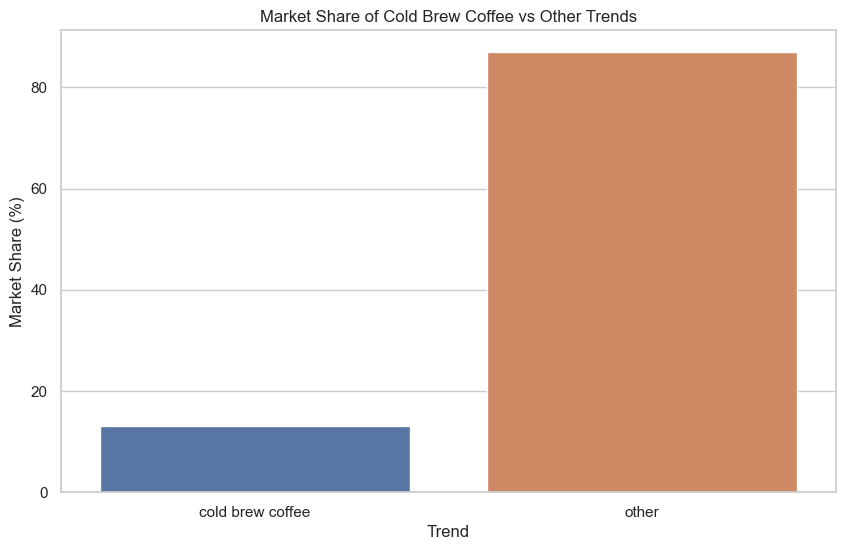

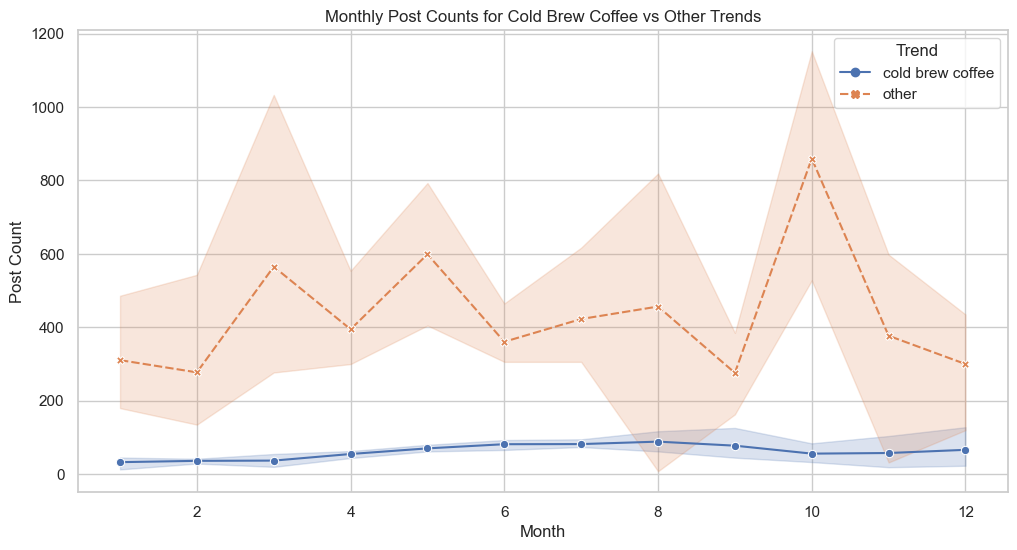

<Figure size 1000x600 with 0 Axes>

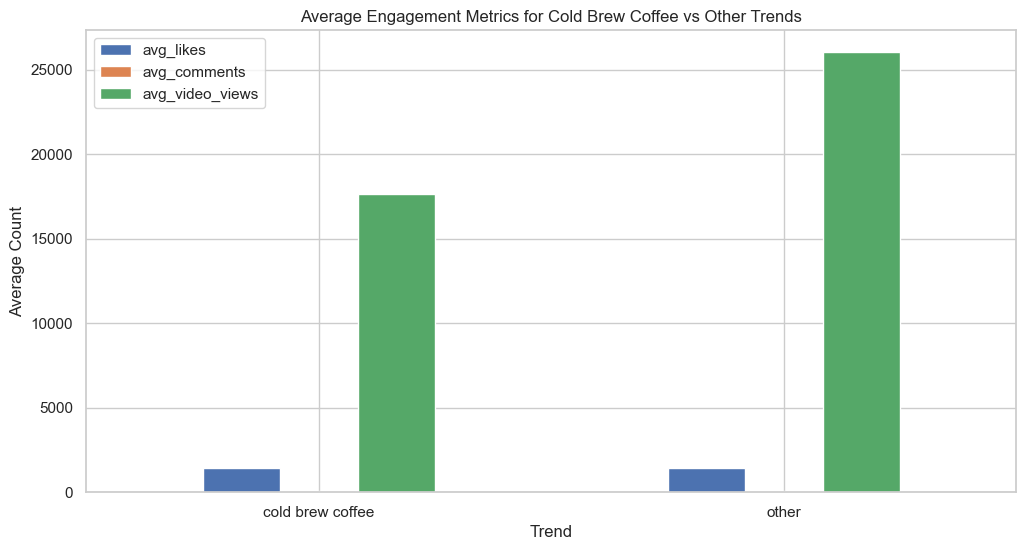

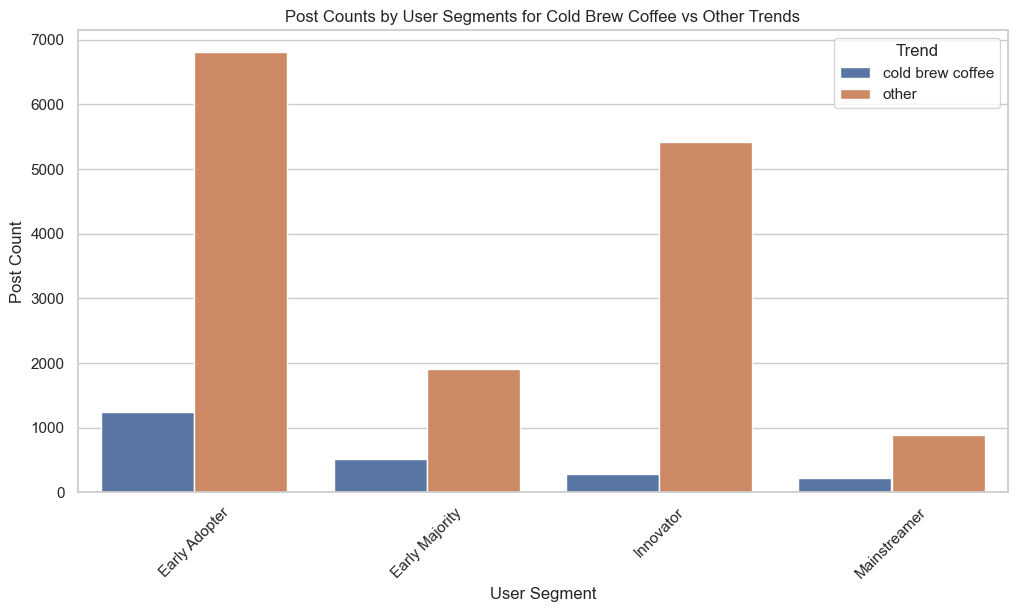

In [33]:
import pandas as pd 
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('Expanded_Q9.csv')

# Convert all column names to lowercase
df.columns = df.columns.str.lower()

# 1. Market Share Comparison (Stacked Bar Chart)
# Assuming 'market_share_percentage' exists after converting columns to lowercase
market_share = df[['trend', 'market_share_percentage', 'total_posts']].drop_duplicates()

plt.figure(figsize=(10, 6))
sns.barplot(x='trend', y='market_share_percentage', data=market_share)
plt.title('Market Share of Cold Brew Coffee vs Other Trends')
plt.ylabel('Market Share (%)')
plt.xlabel('Trend')
plt.show()

# 2. Trend Growth Over Time (Line Chart)
monthly_trend = df[['post_year', 'post_month', 'trend', 'monthly_post_count']].drop_duplicates()

plt.figure(figsize=(12, 6))
sns.lineplot(x='post_month', y='monthly_post_count', hue='trend', data=monthly_trend, markers=True, style='trend')
plt.title('Monthly Post Counts for Cold Brew Coffee vs Other Trends')
plt.ylabel('Post Count')
plt.xlabel('Month')
plt.legend(title='Trend')
plt.show()

# 3. Engagement Metrics Comparison (Bar Chart)
engagement_metrics = df[['trend', 'avg_likes', 'avg_comments', 'avg_video_views']].drop_duplicates()

plt.figure(figsize=(10, 6))
engagement_metrics.set_index('trend')[['avg_likes', 'avg_comments', 'avg_video_views']].plot(kind='bar', figsize=(12, 6))
plt.title('Average Engagement Metrics for Cold Brew Coffee vs Other Trends')
plt.ylabel('Average Count')
plt.xlabel('Trend')
plt.xticks(rotation=0)
plt.show()

# 4. Segmentation Post Count (Bar Chart)
segment_post_counts = df[['segment', 'trend', 'segment_post_count']].drop_duplicates()

plt.figure(figsize=(12, 6))
sns.barplot(x='segment', y='segment_post_count', hue='trend', data=segment_post_counts)
plt.title('Post Counts by User Segments for Cold Brew Coffee vs Other Trends')
plt.ylabel('Post Count')
plt.xlabel('User Segment')
plt.legend(title='Trend')
plt.xticks(rotation=45)
plt.show()


### Question 10: Using the field post_content, what else is being talked about? How would you visualize this?
- **Tool Used**: SQL, Python (WordCloud, Matplotlib)
- **Approach**: Conducted text analysis on `POST_CONTENT` to find common keywords and topics being discussed. Used word frequency analysis and created a word cloud to visualize the key terms.
- **Visualization**: Generated a word cloud to display the most frequently discussed topics in `POST_CONTENT`.


#### 10.a. Objective:
We aim to analyze the `POST_CONTENT` field to identify other common topics, keywords, or trends being discussed alongside "cold brew coffee." This will involve text preprocessing, word frequency analysis, and visualization.

#### 10.b. SQL Query to Extract and Clean Post Content:
```sql
SELECT POST_ID, LOWER(REGEXP_REPLACE(POST_CONTENT, '[^\w\s]', '')) AS cleaned_post_content
FROM DEMO.PUBLIC.POSTS
WHERE POST_CONTENT IS NOT NULL;
```

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\egeha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


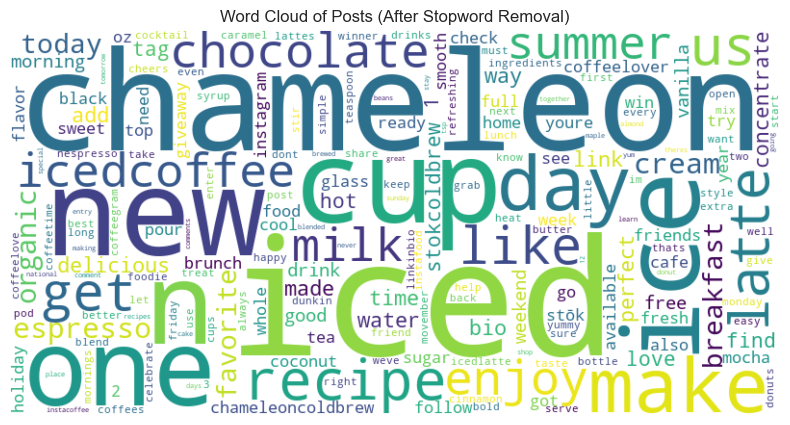

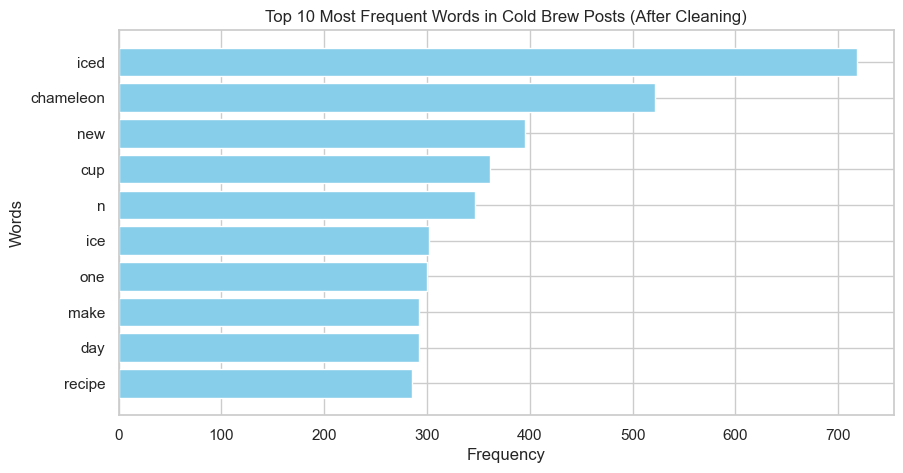

In [45]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Ensure stopwords are available
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('posts.csv')

# Remove NaN values from 'POST_CONTENT' column
df['POST_CONTENT'].dropna(inplace=True)

# Define stopwords and add some additional words we want to exclude
stop_words = set(stopwords.words('english'))
stop_words.update(['nan', 'cold', 'brew', 'coffee', 'coldbrew'])  # Add specific words to exclude

# Clean the post content by removing special characters and converting to lowercase
df['cleaned_post_content'] = df['POST_CONTENT'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x).lower()))

# Split the content into individual words and remove stopwords
df['cleaned_post_content'] = df['cleaned_post_content'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Combine all the cleaned posts into a single string for word cloud generation
all_words = ' '.join(df['cleaned_post_content'])

# Tokenize the words and count their frequency
word_list = all_words.split()
word_freq = Counter(word_list)

# Generate the word cloud from word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Posts (After Stopword Removal)')
plt.show()

# Bar chart for most frequent words (Top 10)
most_common_words_10 = word_freq.most_common(10)

# Separate the words and their counts for plotting
words, counts = zip(*most_common_words_10)

# Plot the bar chart (horizontal bar chart)
plt.figure(figsize=(10, 5))
plt.barh(words, counts, color='skyblue')  # Horizontal bar chart
plt.title('Top 10 Most Frequent Words in Cold Brew Posts (After Cleaning)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.show()



### Question 11: Your boss notices that monthly fluctuations are quite high and asks you to smooth the data, what do you do?
- **Tool Used**: SQL, Analytical Comparison
- **Approach**: Applied a 3-month moving average to smooth the data. SQL window functions and Pandas `rolling()` method were used to calculate the moving average over time.
- **Visualization**: Plotted the original data along with the smoothed data using a line chart to show the trend without fluctuations.

#### SQL Code:

```sql
SELECT 
    POST_YEAR, 
    POST_MONTH, 
    COUNT(*) AS monthly_post_count,
    AVG(COUNT(*)) OVER (ORDER BY POST_YEAR, POST_MONTH ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS moving_avg_3_months
FROM 
    DEMO.PUBLIC.POSTS
GROUP BY 
    POST_YEAR, POST_MONTH
ORDER BY 
    POST_YEAR, POST_MONTH;
```

### Question 12: You are supporting a team of data analysts who want to explore this data in a BI tool like Tableau or Looker. What should be considered in terms of data preparation, cleaning, and presentation?
- **Tool Used**: None
- **Approach**: Ensured data is clean, consistent, and well-structured for easy consumption by BI tools. Created well-defined dimensions and fact tables, aggregated data, and implemented filters for easy exploration.
- **Best Practices**: Ensure documentation, data dictionaries, and pre-aggregated metrics are available for analysts. Implement meaningful column names, remove null values, and handle outliers.

#### 12.a. Data Preparation:
- **Data Structuring**: Denormalize data where possible, create fact tables post_count for instance and dimension tables such as users, segments.
- **Data Aggregation**: Pre-aggregate metrics like post counts and engagement metrics for better performance.
- **Data Consistency**: Ensure consistent formatting (dates, names) and clear column naming conventions.

#### 12.b. Data Cleaning:
- **Handle Missing Values**: Impute or remove null values in key fields like `POST_ID`, `USER_ID`, and `TREND`.
- **Data Deduplication**: Remove duplicate records to prevent inflated metrics.
- **Outliers**: Identify and flag outliers that could skew visualizations.
- **Text Cleaning**: Clean text fields like `POST_CONTENT` by removing special characters.

#### 12.c. Data Presentation:
- **Meaningful Metrics**: Ensure key metrics (post counts, engagement) are aggregated and easily filterable by date, user segment, etc.
- **Time-Series Data**: Include well-formatted date fields for easy analysis.
- **Filters and Parameters**: Predefine common filters (e.g., trends or user segments) for ease of use.
- **Documentation**: Provide data dictionaries to explain column names and calculations.

#### Conclusion:
- To effectively use this data in Tableau or Looker, ensure it is clean, consistent, and well-structured, with pre-aggregated metrics and clear documentation for data analysts to explore efficiently.

